En este NoteBook vamos a mostrar como implementar y visualizar el conjunto de Mandelbrot. El conjunto de Mandelbrot es muy conocido y es un hermoso fractal descubierto en los años 70. La primera imagen de este objeto fue computarizada en 1978

La idea básica detrás del conjunto de Mandelbrot es que tienes un plano en R2 que representa una imagen. Cada punto de ese plano es un número complejo $ z = x + y i $. Ahora, suponga que sucede si, para cada punto $ c $ en el plano, itera una y otra vez calculando un nuevo número de la siguiente manera:

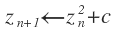
En esta formula $z_0 = 0$ and $c$ es el punto en el plano que estas viendo.

En esta situación, pueden suceder dos cosas diferentes. A medida que avanza la cantidad de iteraciones, $|z|$ tiende al infinito o tiende a 0. Matematicamente, los puntos donde tiende a cero, son parte del conjunto y son de color negro. Los puntos que tienden al infinito no son parte del conjunto y son de color blanco.

Dado que en una computadora no se puede iterar un número infinito de veces, normalmente se establece un límite en la cantidad de veces que se hace este cálculo. Además, puede usar el "qué tan rápido" $|z|$ irá al infinito para colorear el conjunto. También puede verificar si $|z|$ va a infinito simplemente comparando $|z|$ con 2. Si ha crecido tanto, ciertamente no forma parte del conjunto.

Por lo tanto, para un punto $c$, definamos una función _ConjMandel_ que nos diga el número de iteraciones que el punto está llevando a divergir al infinito.

In [14]:
function mandel_pt(c, iter_max=100) #100 es el numero maximo de iteraciones
    iter = 0 
    z    = 0 #sera el que guarde todas las iteraciones
    while (iter < iter_max)
        z = z^2 + c #La formula del conjunto z(n+1) = z(n)2 +c para ir sumando 1 a la z utilizamos el ciclo while
        iter+= 1 #En este vamos a hacer que se sume uno a las iteraciones hasta llegar al maximo de ellas
        if abs(z) > 2.0 #2.0 es nuestro radio de escape si es mayor no se guarda
            return iter  #Regresamos a iter
        end
    end
    0
end

mandel_pt (generic function with 2 methods)

Ahora vamos a asignar todos los puntos en un rectángulo, que representan el plano complejo que van de $z_{min}$ a $z_{max}$  y que calcula la imagen correspondiente, usando mandel_it.


In [15]:
# Regresando al conjunto de Mandelbrot asignando cada punto al número correspondiente de iteraciones
mandel(zmin, zmax, resolution=1000) =
    [ mandel_pt(complex(j, i)) for i=linspace(zmin.im, zmax.im, resolution), j=linspace(zmin.re, zmax.re, resolution) ]
#linspace= Devuelve números espaciados uniformemente durante un intervalo especificado y zmin.im, zmax.im estan en lo linea de los imaginarios y zmin.re, zmax.re estan en la linea de los reales

mandel (generic function with 2 methods)

Ahora que tenemos el conjunto listo lo calculamos

In [39]:
(zmin, zmax) = (-2.2-1.5im, +1.2+1.5im) #Deminimos los zmin y zmax en el plano

(-2.2 - 1.5im, 1.2 + 1.5im)

In [40]:
mandel_set = mandel(zmin, zmax) #Y este sera el conjunto de mandelbrot en un arreglo

1000×1000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1

Ya que terminamos lo graficamos

In [41]:
using PyPlot # Importamos la libreria

In [42]:
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im] #Y esta nos ayudara a "colorear" el arreglo 

to_extent (generic function with 1 method)

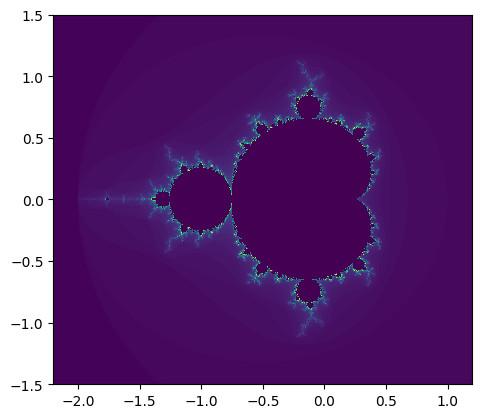

PyObject <matplotlib.image.AxesImage object at 0x7f8dd206eb10>

In [43]:
imshow(mandel_set, origin="lower", extent=to_extent(zmin, zmax))#imshow sirve para graficar los arreglos